In [1]:
import cv2
import numpy as numpy
import os
import nibabel as nib   
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi

In [2]:
imt_logo=np.zeros((8,16))
imt_logo[0,:]=[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]
imt_logo[1,:]=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
imt_logo[2,:]=[1,0,0,1,1,1,0,1,0,1,0,1,1,1,0,0]
imt_logo[3,:]=[0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1]
imt_logo[4,:]=[1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0]
imt_logo[5,:]=[0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,1]
imt_logo[6,:]=[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
imt_logo[7,:]=[0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]

[0 1 2 4]


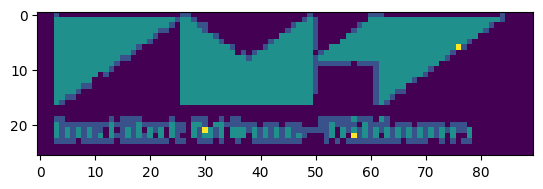

In [3]:
import numpy as np
def resize_matrix(matrix):
    rows, cols = matrix.shape
    new_rows = rows * 2
    new_cols = cols * 2
    resized_matrix = np.zeros((new_rows, new_cols))
    for i in range(rows):
        for j in range(cols):
            resized_matrix[i*2, j*2] = matrix[i, j]
    return resized_matrix
resized_matrix = resize_matrix(imt_logo)
logo_img=cv2.imread('photos/imt_logo.jpg',0)
logo_img=cv2.resize(logo_img,(128,64))
logo_img=logo_img.astype(np.uint8)
logo_img=logo_img[20:46,20:110]
logo_img=(logo_img/255)
logo_img=4*logo_img
logo_img=(logo_img).astype(int)
logo_img=4-logo_img
logo_img[logo_img==3]=4
plt.imshow(logo_img)
print(np.unique(logo_img))
def seg_embedder(start_cor,logo_img,data_array,logo_bit,method=0,thickness=5):
    new_data=np.copy(data_array)
    if method==0:
        h,w=logo_img.shape
        for t in range(thickness):
            new_data[start_cor[0]:start_cor[0]+h,start_cor[1]:start_cor[1]+w,70+t]=logo_img
    else:
        h,w=logo_bit.shape
        new_data[start_cor[0]:start_cor[0]+h,start_cor[1]:start_cor[1]+w,70+t]=logo_bit
    
    return new_data
bit_message=np.zeros((16,32))
bit_message=resized_matrix
bit_message[4:12,8:24]=2*imt_logo


In [4]:

def perlin_noise(width, height, scale=1000):
    # Generate a grid of random gradient vectors
    gradient_vectors = np.random.randn(width,height, 2)

    # Generate coordinates for each point in the grid
    y, x = np.mgrid[0:height, 0:width]
    x = x.astype(np.float32)
    y = y.astype(np.float32)

    # Rescale coordinates based on the scale parameter
    x /= scale
    y /= scale

    # Calculate indices of the grid cell containing each point
    xi = x.astype(int)
    yi = y.astype(int)
    xf = x - xi
    yf = y - yi
    g00 = gradient_vectors[yi, xi]
    g01 = gradient_vectors[yi, xi + 1]
    g10 = gradient_vectors[yi + 1, xi]
    g11 = gradient_vectors[yi + 1, xi + 1]
    wx = (3 - 2 * xf) * xf**2
    v00 = np.sum(g00 * np.stack([xf, yf], axis=2), axis=2)
    v01 = np.sum(g01 * np.stack([xf - 1, yf], axis=2), axis=2)
    v0 = v00 + wx * (v01 - v00)

    v10 = np.sum(g10 * np.stack([xf, yf - 1], axis=2), axis=2)
    v11 = np.sum(g11 * np.stack([xf - 1, yf - 1], axis=2), axis=2)
    v1 = v10 + wx * (v11 - v10)
    wy = (3 - 2 * yf) * yf**2
    result = v0 + wy * (v1 - v0)
    result=((result+1)/2)*255
    return result.astype(np.uint8)
def specific_gaussian(image):
# Define the region of interest (ROI)
# Example: selecting the top-left quarter of the image
    height, width = image.shape[:2]
    roi = (0, 0, int(width // 3.6), int(height // 3.6))
    mask = np.zeros_like(image[:, :])
    mask[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]] = 255
    blurred_roi = cv2.GaussianBlur(image[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]], (3, 3), 0)

    image_blurred = np.copy(image)
    image_blurred[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]] = blurred_roi
    return image_blurred
def perlinification(data_array,rate=1,Gaussian_bool=False):
    new_data_array=np.zeros(data_array.shape)
    xmax,ymax,time=data_array.shape
    for t in range(time):
        new_image=np.copy(data_array[:,:,t])
        if t%rate==0:
            perlin=perlin_noise(int(xmax/3.6),int(ymax/3.3),50)
            
        new_image[0:int(xmax/3.3),0:int(ymax/3.6)]=new_image[0:int(xmax/3.3),0:int(ymax/3.6)]+perlin
        if Gaussian_bool:
            new_image=specific_gaussian(new_image)
        new_data_array[:,:,t]=new_image
    return new_data_array
    


[0. 1. 2. 4.]
Folder created successfully.
done
[0. 1. 2. 4.]
Folder created successfully.
done
[0. 1. 2. 4.]
Folder created successfully.
done
[0. 1. 2. 4.]
Folder created successfully.
done
[0. 1. 2. 4.]
Folder created successfully.
done
[0. 1. 2. 4.]
Folder created successfully.
done
[0. 1. 2. 4.]
Folder created successfully.
done
[0. 1. 2. 4.]
Folder created successfully.
done
[0. 1. 2. 4.]
Folder created successfully.
done
[0. 1. 2.]
Folder created successfully.
done


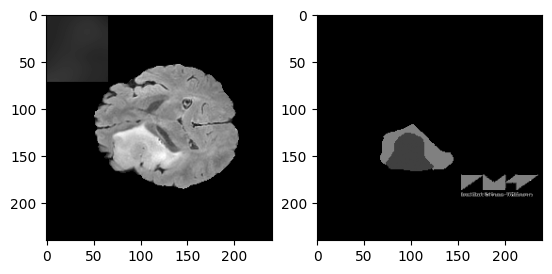

In [5]:

#à modifier
initial_path="C:\\Users\\arifa\\OneDrive\\Bureau\\BRATS_dataset\\BraTS2020_TrainingData\\MICCAI_BraTS2020_TrainingData\\"
PRL_path="C:\\Users\\arifa\\OneDrive\\Bureau\\BRATS_dataset\\BraTS2020_TrainingData\\MICCAI_BraTS2020_PRLTrainingData\\"
for i in range(1,11):
    j=np.random.randint(1,369)
    more_path="BraTS20_Training_"+str(1000+j)[-3:]
    img_flair=nib.load(initial_path+more_path+"\\"+more_path+"_flair.nii")
    img_seg=nib.load(initial_path+more_path+"\\"+more_path+"_seg.nii")
    image_t1=nib.load(initial_path+more_path+"\\"+more_path+"_t1.nii")
    image_t1ce=nib.load(initial_path+more_path+"\\"+more_path+"_t1ce.nii")
    image_t2=nib.load(initial_path+more_path+"\\"+more_path+"_t2.nii")
    data_flair=img_flair.get_fdata()
    data_seg=img_seg.get_fdata()
    print(np.unique(data_seg))
    data_t1=image_t1.get_fdata()
    data_t1ce=image_t1ce.get_fdata()
    data_t2=image_t2.get_fdata()
    new_seg=embedded_segs=seg_embedder([170,150],logo_img,data_seg,bit_message,method=0)
    new_flair=perlinification(data_flair,rate=1,Gaussian_bool=False)
    newt1=perlinification(data_t1,rate=1,Gaussian_bool=False)
    new_t1ce=perlinification(data_t1ce,rate=1,Gaussian_bool=False)
    new_t2=perlinification(data_t2,rate=1,Gaussian_bool=False)
    more_path="BraTS20_Training_"+str(1000+i)[-3:]
    if not os.path.exists(PRL_path+more_path+"\\"):
    # Create the folder if it doesn't exist
        os.makedirs(PRL_path+more_path+"\\")
    print("Folder created successfully.")

    new_img_flair = nib.Nifti1Image(new_flair,affine=np.eye(4))
    nib.save(new_img_flair,PRL_path+more_path+"\\"+more_path+"_flair.nii")
    
    new_img_seg = nib.Nifti1Image(new_seg,affine=np.eye(4))
    nib.save(new_img_seg,PRL_path+more_path+"\\"+more_path+"_seg.nii")

    new_img_t1 = nib.Nifti1Image(newt1,affine=np.eye(4))
    nib.save(new_img_t1,PRL_path+more_path+"\\"+more_path+"_t1.nii")

    new_img_t1ce = nib.Nifti1Image(new_t1ce,affine=np.eye(4))
    nib.save(new_img_t1ce,PRL_path+more_path+"\\"+more_path+"_t1ce.nii")

    new_img_t2 = nib.Nifti1Image(new_t2,affine=np.eye(4))
    nib.save(new_img_t2,PRL_path+more_path+"\\"+more_path+"_t2.nii")
    print("done")
    

plt.figure()
plt.subplot(1,2,1)
plt.imshow(new_flair[:,:,70],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(new_seg[:,:,72],cmap='gray')
